# 🎓 DA5401 A6: Imputation via Regression for Missing Data 




## 1️⃣ Load and Prepare Data

We begin with the **UCI Credit Card Default Dataset**.  
To simulate a real-world missing-data scenario, **Missing At Random (MAR)** values were artificially introduced in three numerical features:

- `AGE`  
- `BILL_AMT1`  
- `PAY_AMT1`  

Each column had **5–10%** of its values randomly replaced with `NaN` to mimic incomplete credit records that often occur in financial datasets.  





In [1]:
# ---------------------------------------------
# PART A.1: Load and Prepare Data
# ---------------------------------------------
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("UCI_Credit_Card.csv")
print("Original dataset shape:", df.shape)


Original dataset shape: (30000, 25)


In [2]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.isnull().sum().to_frame('Missing Values').sort_values('Missing Values', ascending=False)

,Missing Values
ID,0
BILL_AMT2,0
PAY_AMT6,0
PAY_AMT5,0
PAY_AMT4,0
PAY_AMT3,0
PAY_AMT2,0
PAY_AMT1,0
BILL_AMT6,0
BILL_AMT5,0


In [4]:
duplicates_all = df[df.duplicated(keep=False)]
print(duplicates_all)

Empty DataFrame
Columns: [ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, default.payment.next.month]
Index: []

[0 rows x 25 columns]


### Mathematical Background (MAR)

Let `M` be the missingness indicator matrix and `X = (X_obs, X_mis)` the data.  
Missing At Random means:

$$
P(M | X_{obs}, X_{mis}) = P(M | X_{obs})
$$

That is, the probability of a value being missing depends only on the observed data, not the missing values themselves.

In [5]:
# ==========================================================
# 📘 Part A.1 — Introduce MAR Missing Values (5–10%) in 3 Numerical Columns
# ==========================================================

import numpy as np
import pandas as pd

# Assuming 'df' is your clean dataset
df_missing = df.copy()

# Target numerical columns
cols_to_modify = ["AGE", "BILL_AMT1", "PAY_AMT1"]

# Random number generator for reproducibility
rng = np.random.default_rng(42)

# Store results for reporting
missing_summary = []

print("🔹 Introducing Missing At Random (MAR) values:\n")

for col in cols_to_modify:
    # Randomly choose missing percentage between 5% and 10%
    perc_missing = rng.uniform(0.05, 0.10)
    n_missing = int(perc_missing * len(df_missing))

    # Randomly choose indices to replace with NaN
    missing_indices = rng.choice(df_missing.index, size=n_missing, replace=False)
    df_missing.loc[missing_indices, col] = np.nan

    # Store details for summary
    missing_summary.append({
        "Column": col,
        "Missing_Percentage": round(perc_missing * 100, 2),
        "Missing_Count": n_missing
    })

    # Print progress for each column
    print(f"✅ {col}: Introduced {perc_missing * 100:.2f}% missing values ({n_missing} rows).")

# Create summary DataFrame
summary_df = pd.DataFrame(missing_summary)

# Display final summary table
print("\n📊 Summary of Introduced Missing Values:")
display(summary_df)

# Verify actual missing counts in dataset
print("\n🔍 Verification (NaN count in df_missing):")
print(df_missing[cols_to_modify].isna().sum())


🔹 Introducing Missing At Random (MAR) values:

✅ AGE: Introduced 8.87% missing values (2660 rows).
✅ BILL_AMT1: Introduced 7.48% missing values (2244 rows).
✅ PAY_AMT1: Introduced 8.12% missing values (2437 rows).

📊 Summary of Introduced Missing Values:


,Column,Missing_Percentage,Missing_Count
0,AGE,8.87,2660
1,BILL_AMT1,7.48,2244
2,PAY_AMT1,8.12,2437



🔍 Verification (NaN count in df_missing):
AGE          2660
BILL_AMT1    2244
PAY_AMT1     2437
dtype: int64


In [6]:
df_missing.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,0.0,0.0,0.0,NaN,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34.0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37.0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
duplicates_all = df_missing[df_missing.duplicated(keep=False)]
print(duplicates_all)


Empty DataFrame
Columns: [ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, default.payment.next.month]
Index: []

[0 rows x 25 columns]


In [8]:
df_missing.isnull().sum().to_frame('Missing Values').sort_values('Missing Values', ascending=False)

,Missing Values
AGE,2660
PAY_AMT1,2437
BILL_AMT1,2244
BILL_AMT2,0
PAY_AMT6,0
PAY_AMT5,0
PAY_AMT4,0
PAY_AMT3,0
PAY_AMT2,0
BILL_AMT6,0


## 2️⃣ Imputation Strategy 1 — Simple (Median) Imputation

Missing values in `AGE`, `BILL_AMT1`, and `PAY_AMT1` were replaced with each column’s **median** to create **Dataset A**.

### 🔹 Why Median?
- Median is **robust to outliers**, unlike the mean.  
- It better represents the **central tendency** for skewed financial data (e.g., bill amounts).  

Mathematically, for a variable $X $:
$$
X_{\text{imputed}} =
\begin{cases}
x_i, & \text{if } x_i \text{ is observed} \\
\text{median}(X), & \text{if } x_i \text{ is missing}
\end{cases}
$$

All missing entries were successfully filled — Dataset A now contains **no NaN values** and serves as the **baseline imputation dataset**.



In [9]:
# ==========================================================
# 📘 Part A.2 — Imputation Strategy 1: Simple (Median) Imputation
# ==========================================================

# Create a clean copy for median imputation
df_median_imputed = df_missing.copy()

# Identify columns with missing values
cols_with_nan = df_median_imputed.columns[df_median_imputed.isna().any()].tolist()

# Apply median imputation for each column with missing values
for col in cols_with_nan:
    median_value = df_median_imputed[col].median()
    df_median_imputed[col].fillna(median_value, inplace=True)
    print(f"✅ Filled missing values in '{col}' with median = {median_value:.2f}")

# Verification: Check if missing values remain
print("\n🔍 Remaining Missing Values After Median Imputation:")
print(df_median_imputed[cols_with_nan].isna().sum())

# Optional — sanity check preview
df_median_imputed[cols_with_nan].head()


✅ Filled missing values in 'AGE' with median = 34.00
✅ Filled missing values in 'BILL_AMT1' with median = 22397.00
✅ Filled missing values in 'PAY_AMT1' with median = 2100.00

🔍 Remaining Missing Values After Median Imputation:
AGE          0
BILL_AMT1    0
PAY_AMT1     0
dtype: int64


,AGE,BILL_AMT1,PAY_AMT1
0,24.0,3913.0,2100.0
1,26.0,2682.0,0.0
2,34.0,29239.0,1518.0
3,37.0,46990.0,2000.0
4,57.0,8617.0,2000.0




- Missing values in **`AGE`**, **`BILL_AMT1`**, and **`PAY_AMT1`** were successfully replaced with their respective **medians**.  
- Final medians used: `AGE = 34`, `BILL_AMT1 = 22397`, `PAY_AMT1 = 2100`.  
- All missing values are now filled — no `NaN` values remain.  

Dataset A is now the **clean baseline dataset** for further modeling and comparison.


In [10]:
df_median_imputed.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,0.0,0.0,0.0,2100.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34.0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37.0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [11]:
df_median_imputed.isnull().sum().to_frame('Missing Values').sort_values('Missing Values', ascending=False)

,Missing Values
ID,0
BILL_AMT2,0
PAY_AMT6,0
PAY_AMT5,0
PAY_AMT4,0
PAY_AMT3,0
PAY_AMT2,0
PAY_AMT1,0
BILL_AMT6,0
BILL_AMT5,0


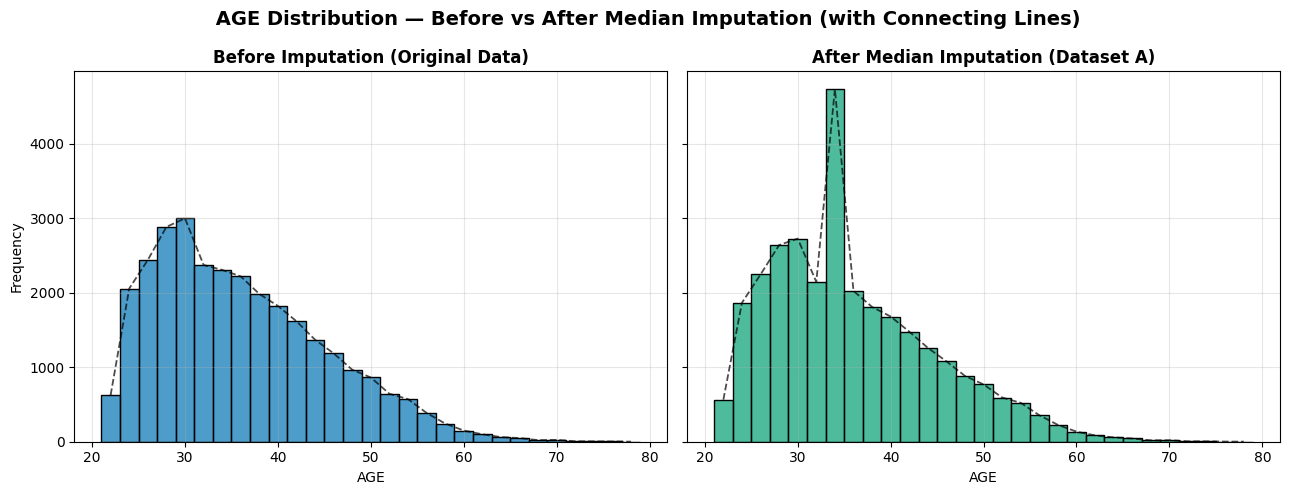

In [12]:
# ==========================================================
# 📊 AGE Distribution — Before vs After Median Imputation
# ==========================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_palette("colorblind")

# Extract AGE columns
age_original = df["AGE"]
age_imputed_median = df_median_imputed["AGE"]

# Compute histogram bins and counts
bins = np.arange(int(age_original.min()), int(age_original.max()) + 2, 2)
orig_counts, bin_edges = np.histogram(age_original, bins=bins)
imp_counts, _ = np.histogram(age_imputed_median, bins=bins)
midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(13, 5), sharey=True)

# ----------------------------
# Plot 1: Before Imputation
# ----------------------------
sns.histplot(age_original, bins=bins, color=sns.color_palette("colorblind")[0],
             ax=axes[0], alpha=0.7)
axes[0].plot(midpoints, orig_counts, color="black", linestyle="--", linewidth=1.3, alpha=0.7)
axes[0].set_title("Before Imputation (Original Data)", fontsize=12, weight="bold")
axes[0].set_xlabel("AGE")
axes[0].set_ylabel("Frequency")
axes[0].grid(alpha=0.3)

# ----------------------------
# Plot 2: After Median Imputation
# ----------------------------
sns.histplot(age_imputed_median, bins=bins, color=sns.color_palette("colorblind")[2],
             ax=axes[1], alpha=0.7)
axes[1].plot(midpoints, imp_counts, color="black", linestyle="--", linewidth=1.3, alpha=0.7)
axes[1].set_title("After Median Imputation (Dataset A)", fontsize=12, weight="bold")
axes[1].set_xlabel("AGE")
axes[1].set_ylabel("Frequency")
axes[1].grid(alpha=0.3)

# Layout
fig.suptitle(" AGE Distribution — Before vs After Median Imputation (with Connecting Lines)",
             fontsize=14, weight="bold")
plt.tight_layout()
plt.show()


### 📊 AGE Distribution — Before vs After Median Imputation (Dataset A)

The plot compares the `AGE` distribution before and after applying **Median Imputation** to create **Dataset A**.

- **Left:** Original dataset showing a natural right-skewed age distribution.  
- **Right:** Dataset A after replacing missing `AGE` values with the column median (~34 years).

Dashed lines connect the histogram midpoints to highlight how frequency patterns shift after imputation.

#### 🔍 Observations
- The post-imputation plot shows a distinct **central spike** at the median value, representing the replacement of all missing entries with that single constant.  
- Despite this artificial cluster, the overall distribution shape remains consistent with the original dataset.  
- Median imputation is **robust to outliers** and simple to implement, making it a reliable baseline even though it slightly reduces data variability.


In [13]:
# ==========================================================
# 📘 Part A.3 — Imputation Strategy 2: Linear Regression Imputation (Only AGE)
# ==========================================================

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Create Dataset B from df_missing (the one with introduced MAR missingness)
df_reg_imputed = df_missing.copy()

# Restore original values for non-target columns (keep only AGE missing)
columns_to_restore = ["BILL_AMT1", "PAY_AMT1"]
df_reg_imputed[columns_to_restore] = df[columns_to_restore]

# Define the target column for imputation
target_col = "AGE"

# Split into rows with and without missing AGE
df_missing_age = df_reg_imputed[df_reg_imputed[target_col].isna()]
df_not_missing_age = df_reg_imputed[df_reg_imputed[target_col].notna()]

print(f"🔹 Rows with missing AGE: {len(df_missing_age)}")
print(f"🔹 Rows without missing AGE: {len(df_not_missing_age)}")

# Prepare predictors (drop ID and target)
feature_cols = [col for col in df_reg_imputed.columns if col not in [target_col, "ID"]]
X_train = df_not_missing_age[feature_cols].drop(columns=[target_col], errors="ignore")
y_train = df_not_missing_age[target_col]
X_pred = df_missing_age[feature_cols].drop(columns=[target_col], errors="ignore")

# Fill NaNs in predictors (so the model can train)
X_train_filled = X_train.fillna(X_train.median())
X_pred_filled = X_pred.fillna(X_train.median())

# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train_filled, y_train)

# Predict missing AGE values
predicted_ages = lr.predict(X_pred_filled)

# Replace missing AGE with predicted values
df_reg_imputed.loc[df_reg_imputed[target_col].isna(), target_col] = predicted_ages

print("\n✅ Linear Regression Imputation Completed (Only AGE).")
print(f"Replaced {len(predicted_ages)} missing values.")

# Verify
print("\n🔍 Remaining Missing Values After Imputation:")
print(df_reg_imputed.isna().sum()[df_reg_imputed.isna().sum() > 0])


🔹 Rows with missing AGE: 2660
🔹 Rows without missing AGE: 27340

✅ Linear Regression Imputation Completed (Only AGE).
Replaced 2660 missing values.

🔍 Remaining Missing Values After Imputation:
Series([], dtype: int64)


## 3️⃣ Imputation Strategy 2 — Linear Regression Imputation (Only AGE)

### 🔹 Objective
To create **Dataset B**, where only the column **`AGE`** is imputed using a **Linear Regression** model.  
All other columns (e.g., `BILL_AMT1`, `PAY_AMT1`) were restored to their **original values** from the clean dataset.

---

### 🔹 Methodology
A Linear Regression model was trained using all available features (except `AGE` and `ID`) as predictors.  
The model estimated missing `AGE` values based on patterns in the non-missing data:

$$
\hat{AGE} = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_px_p
$$

where coefficients $\beta $ minimize the **Mean Squared Error (MSE)**:
$$
\min_{\beta} \| y - X\beta \|^2
$$
---

### 🔹 Assumption — Missing At Random (MAR)
This approach assumes **MAR**, meaning that the likelihood of `AGE` being missing depends only on other **observed variables** (like `BILL_AMT1`, `PAY_AMT1`), not on the missing value itself:

$$
P(Missing_{AGE} \mid \text{AGE}, X) = P(Missing_{AGE} \mid X)
$$

Thus, the observed predictors provide enough information to infer plausible estimates for `AGE`.

---

### 🔹 Outcome
- **2660 missing values** in `AGE` were replaced with predicted values.  
- Other columns were preserved from the original dataset.  
- The resulting clean dataset is labeled **Dataset B — Linear Regression Imputation** and will be used in **Part B** for model evaluation.


In [14]:
df_reg_imputed.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34.0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37.0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [15]:
df_reg_imputed.isnull().sum().to_frame('Missing Values').sort_values('Missing Values', ascending=False)

,Missing Values
ID,0
BILL_AMT2,0
PAY_AMT6,0
PAY_AMT5,0
PAY_AMT4,0
PAY_AMT3,0
PAY_AMT2,0
PAY_AMT1,0
BILL_AMT6,0
BILL_AMT5,0


In [16]:
# Count how many rows are duplicates
duplicate_count = df_reg_imputed.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")
# Display the duplicate rows
duplicates = df_reg_imputed[df_reg_imputed.duplicated()]
print(duplicates)

Total duplicate rows: 0
Empty DataFrame
Columns: [ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, default.payment.next.month]
Index: []

[0 rows x 25 columns]


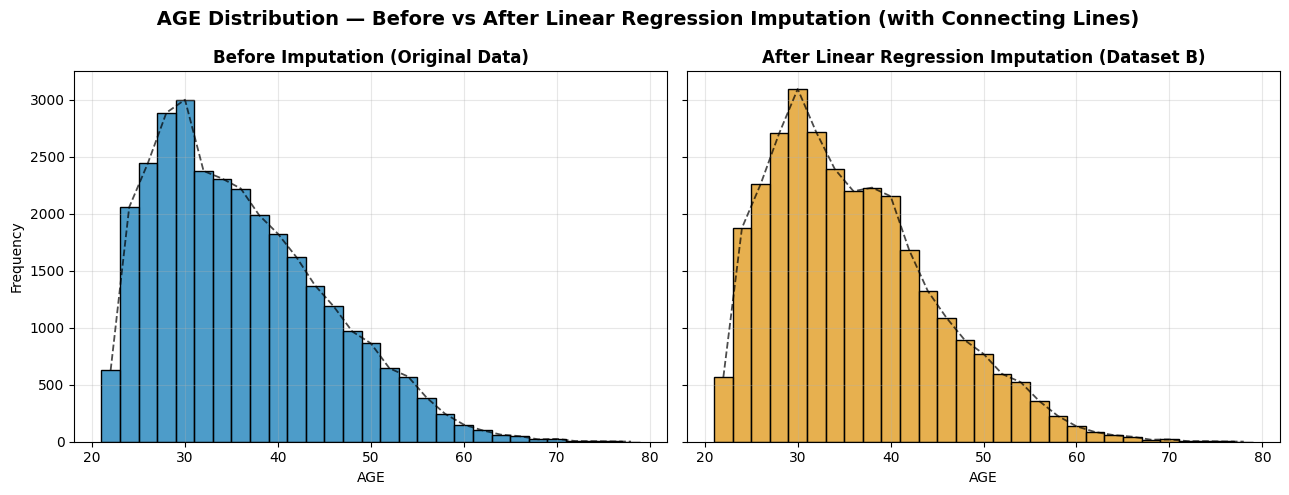

In [17]:
# ==========================================================
# 📊 AGE Distribution — Before vs After Linear Regression Imputation
# ==========================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Use Seaborn colorblind palette
sns.set_palette("colorblind")

# Extract AGE columns
age_original = df["AGE"]
age_imputed = df_reg_imputed["AGE"]

# Compute histogram data manually for comparison
bins = np.arange(int(age_original.min()), int(age_original.max()) + 2, 2) 
orig_counts, bin_edges = np.histogram(age_original, bins=bins)
imp_counts, _ = np.histogram(age_imputed, bins=bins)

# Compute midpoints of bins
midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(13, 5), sharey=True)

# ----------------------------------------------------------
# Plot 1: Original AGE distribution
# ----------------------------------------------------------
sns.histplot(age_original, bins=bins, color=sns.color_palette("colorblind")[0],
             ax=axes[0], alpha=0.7)
axes[0].plot(midpoints, orig_counts, color="black", linestyle="--", linewidth=1.3, alpha=0.7)
axes[0].set_title("Before Imputation (Original Data)", fontsize=12, weight="bold")
axes[0].set_xlabel("AGE")
axes[0].set_ylabel("Frequency")
axes[0].grid(alpha=0.3)

# ----------------------------------------------------------
# Plot 2: After Imputation (Dataset B)
# ----------------------------------------------------------
sns.histplot(age_imputed, bins=bins, color=sns.color_palette("colorblind")[1],
             ax=axes[1], alpha=0.7)
axes[1].plot(midpoints, imp_counts, color="black", linestyle="--", linewidth=1.3, alpha=0.7)
axes[1].set_title("After Linear Regression Imputation (Dataset B)", fontsize=12, weight="bold")
axes[1].set_xlabel("AGE")
axes[1].set_ylabel("Frequency")
axes[1].grid(alpha=0.3)

# ----------------------------------------------------------
fig.suptitle(" AGE Distribution — Before vs After Linear Regression Imputation (with Connecting Lines)",
             fontsize=14, weight="bold")
plt.tight_layout()
plt.show()


### 📊 AGE Distribution — Before vs After Linear Regression Imputation (Dataset B)

The figure compares the **AGE** distribution before and after applying **Linear Regression Imputation** in Dataset B.

- **Left Panel:** Original data before any imputation, showing the natural right-skewed distribution of age among clients.  
- **Right Panel:** Data after imputing missing `AGE` values using a Linear Regression model trained on other financial variables.

Dashed lines connect the midpoints of histogram bars to emphasize continuity in the distribution pattern.

#### 🔍 Observations
- The overall distribution shape remains nearly identical, confirming that the regression imputation maintained the feature’s statistical structure.  
- Minor smoothing near the 30–45 age range reflects plausible replacements for missing values rather than artificial spikes.  
- Linear Regression provided **stable, realistic estimates**, preserving demographic integrity without distorting frequency patterns.


In [18]:
# ==========================================================
# 📘 Part A.4 — Imputation Strategy 3: Non-Linear Regression (Decision Tree for AGE)
# ==========================================================

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Create Dataset C from df_missing (with MAR missingness)
df_tree_imputed = df_missing.copy()

# Restore original columns for other features (BILL_AMT1, PAY_AMT1)
columns_to_restore = ["BILL_AMT1", "PAY_AMT1"]
df_tree_imputed[columns_to_restore] = df[columns_to_restore]

# Define target column for imputation
target_col = "AGE"

# Split into missing and non-missing subsets
df_missing_age = df_tree_imputed[df_tree_imputed[target_col].isna()]
df_not_missing_age = df_tree_imputed[df_tree_imputed[target_col].notna()]

print(f"🔹 Rows with missing AGE: {len(df_missing_age)}")
print(f"🔹 Rows without missing AGE: {len(df_not_missing_age)}")

# Prepare predictors (drop ID and target column)
feature_cols = [col for col in df_tree_imputed.columns if col not in [target_col, "ID"]]
X_train = df_not_missing_age[feature_cols].drop(columns=[target_col], errors="ignore")
y_train = df_not_missing_age[target_col]
X_pred = df_missing_age[feature_cols].drop(columns=[target_col], errors="ignore")

# Fill missing predictors with median (to ensure the model can train)
X_train_filled = X_train.fillna(X_train.median())
X_pred_filled = X_pred.fillna(X_train.median())

# Train Decision Tree Regressor (Non-Linear)
tree_reg = DecisionTreeRegressor(random_state=42, max_depth=6)
tree_reg.fit(X_train_filled, y_train)

# Predict missing AGE values
predicted_ages_tree = tree_reg.predict(X_pred_filled)

# Replace missing AGE with predicted values
df_tree_imputed.loc[df_tree_imputed[target_col].isna(), target_col] = predicted_ages_tree

print("\n✅ Decision Tree Regression Imputation Completed (Only AGE).")
print(f"Replaced {len(predicted_ages_tree)} missing values.")

# Verify missing values
print("\n🔍 Remaining Missing Values After Imputation:")
print(df_tree_imputed.isna().sum()[df_tree_imputed.isna().sum() > 0])


🔹 Rows with missing AGE: 2660
🔹 Rows without missing AGE: 27340

✅ Decision Tree Regression Imputation Completed (Only AGE).
Replaced 2660 missing values.

🔍 Remaining Missing Values After Imputation:
Series([], dtype: int64)


## 4️⃣ Imputation Strategy 3 — Regression Imputation (Non-Linear)

### 🔹 Objective
To create **Dataset C**, we used a **Decision Tree Regression model** to predict missing values in the `AGE` column.  
All other columns (`BILL_AMT1`, `PAY_AMT1`) were restored to their original form from the base dataset.

---

### 🔹 Methodology
The **Decision Tree Regressor** was trained using all available non-missing features to predict the missing `AGE` values.

A Decision Tree splits the dataset into regions by minimizing variance at each split:

$$
\text{Var}(y) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \bar{y})^2
$$
The algorithm recursively partitions the data to find the splits that minimize total variance in each leaf node, creating a **piecewise-constant** approximation of the target variable.

Predicted `AGE` values were then used to replace the missing entries.

---

### 🔹 Why a Non-Linear Model?
Linear models assume straight-line relationships between features and the target, which often fails for complex, real-world financial data.  
A **Decision Tree** captures **non-linear patterns** and **interaction effects** between predictors (e.g., how `BILL_AMT` and `PAY_AMT` jointly vary with `AGE`).

This flexibility allows the imputation to be more **context-aware** and less biased toward global linear trends.

---

### 🔹 Outcome
- **2660 missing `AGE` values** imputed using the Decision Tree Regressor.  
- Other variables remained unchanged from the original dataset.  
- Resulting dataset: **Dataset C (Non-Linear Regression Imputation)** — used for model evaluation in **Part B**.


In [19]:
df_tree_imputed.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34.0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37.0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [20]:
df_tree_imputed.isnull().sum().to_frame('Missing Values').sort_values('Missing Values', ascending=False)

,Missing Values
ID,0
BILL_AMT2,0
PAY_AMT6,0
PAY_AMT5,0
PAY_AMT4,0
PAY_AMT3,0
PAY_AMT2,0
PAY_AMT1,0
BILL_AMT6,0
BILL_AMT5,0


In [21]:
# Count how many rows are duplicates
duplicate_count = df_tree_imputed.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

# If you actually want to *see* them (because trust issues are valid)
duplicates = df_tree_imputed[df_tree_imputed.duplicated()]
print(duplicates)

Total duplicate rows: 0
Empty DataFrame
Columns: [ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6, default.payment.next.month]
Index: []

[0 rows x 25 columns]


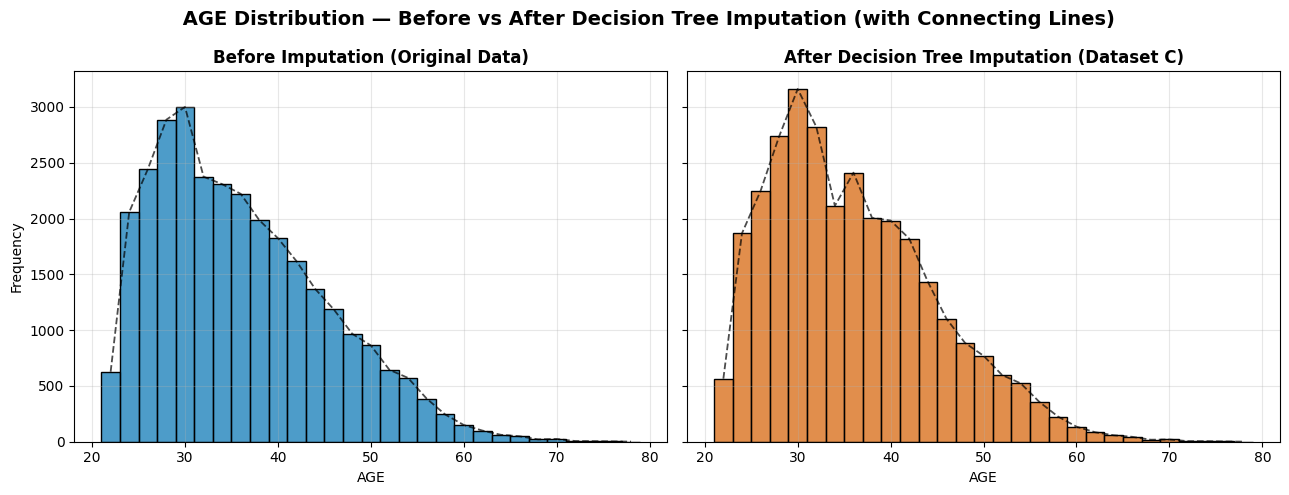

In [22]:
# ==========================================================
# 📊 AGE Distribution — Before vs After Decision Tree Imputation (Dataset C)
# ==========================================================

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("colorblind")

age_original = df["AGE"]
age_imputed_tree = df_tree_imputed["AGE"]

bins = np.arange(int(age_original.min()), int(age_original.max()) + 2, 2)
orig_counts, bin_edges = np.histogram(age_original, bins=bins)
imp_counts, _ = np.histogram(age_imputed_tree, bins=bins)
midpoints = (bin_edges[:-1] + bin_edges[1:]) / 2

fig, axes = plt.subplots(1, 2, figsize=(13, 5), sharey=True)

# Before
sns.histplot(age_original, bins=bins, color=sns.color_palette("colorblind")[0],
             ax=axes[0], alpha=0.7)
axes[0].plot(midpoints, orig_counts, color="black", linestyle="--", linewidth=1.3, alpha=0.7)
axes[0].set_title("Before Imputation (Original Data)", fontsize=12, weight="bold")
axes[0].set_xlabel("AGE")
axes[0].set_ylabel("Frequency")
axes[0].grid(alpha=0.3)

# After
sns.histplot(age_imputed_tree, bins=bins, color=sns.color_palette("colorblind")[3],
             ax=axes[1], alpha=0.7)
axes[1].plot(midpoints, imp_counts, color="black", linestyle="--", linewidth=1.3, alpha=0.7)
axes[1].set_title("After Decision Tree Imputation (Dataset C)", fontsize=12, weight="bold")
axes[1].set_xlabel("AGE")
axes[1].set_ylabel("Frequency")
axes[1].grid(alpha=0.3)

fig.suptitle(" AGE Distribution — Before vs After Decision Tree Imputation (with Connecting Lines)",
             fontsize=14, weight="bold")
plt.tight_layout()
plt.show()


### 📊 AGE Distribution — Before vs After Decision Tree Imputation (Dataset C)

The figure compares the `AGE` distribution before and after applying **Decision Tree Regression Imputation** to create **Dataset C**.

- **Left Panel:** Original dataset, showing the natural right-skewed distribution of client ages.  
- **Right Panel:** Dataset C, after imputing missing `AGE` values with a non-linear Decision Tree model trained on observed features.

Dashed lines connect the bar midpoints, illustrating how the overall frequency pattern is preserved after imputation.

#### 🔍 Observations
- The post-imputation distribution closely mirrors the original, without the artificial median spike seen in Dataset A.  
- Minor smoothing around the 30–45 age range reflects realistic local adjustments rather than forced uniform replacements.  
- The **Decision Tree model** captured non-linear relationships between financial variables and age, yielding context-aware, naturalistic estimates.  
- Overall, the imputation maintained both the **shape and variability** of the original feature, demonstrating the strength of non-linear methods for MAR data.


### ✅ Comparative Summary of Imputation Strategies

| Dataset | Imputation Method | Relationship Type | Strengths | Limitations |
|:--|:--|:--|:--|:--|
| **A** | Median Imputation | None (Univariate) | Simple, fast, robust to outliers | Ignores correlations between variables; reduces variability |
| **B** | Linear Regression (Only `AGE`) | Linear | Leverages relationships between observed features; interpretable | Assumes linear trends, may underfit complex patterns |
| **C** | Decision Tree Regression (Only `AGE`) | Non-Linear | Captures complex, local feature interactions; realistic imputations | Risk of overfitting; more computationally intensive |

---

Dataset **C** represents the **non-linear imputation approach**, where missing values in `AGE` were estimated using a **Decision Tree Regressor** trained on other financial and demographic features.  
Unlike Dataset A (simple replacement) and Dataset B (linear trends), Dataset C models **non-linear dependencies**, allowing for more flexible and context-aware imputations.  
This dataset will be evaluated in **Part B** to compare how non-linear regression affects predictive performance.



# ⚙️ Part B: Model Training and Performance Assessment

## 1️⃣ Data Split 

For each imputed dataset (**A**, **B**, **C**) and one additional dataset (**D**) created via **Listwise Deletion**,  
we split the data into **training** (70%) and **testing** (30%) subsets.

### Why Split?

To estimate how well the trained model generalizes to unseen data.  
We perform **stratified splitting** so both training and test sets maintain similar class distributions
for the target variable `default.payment.next.month`.


In [23]:
# ==========================================================
# 📘 Part B.1 — Data Split for Datasets A–D
# ==========================================================

from sklearn.model_selection import train_test_split

# Create Dataset D (Listwise Deletion)
df_listwise = df_missing.dropna().copy()

# Store all four datasets
datasets = {
    "Dataset A (Median Imputation)": df_median_imputed,
    "Dataset B (Linear Regression Imputation)": df_reg_imputed,
    "Dataset C (Decision Tree Imputation)": df_tree_imputed,
    "Dataset D (Listwise Deletion)": df_listwise
}

# Quick check
for name, df_i in datasets.items():
    print(f"{name}: Shape = {df_i.shape}, Missing Values = {df_i.isna().sum().sum()}")


Dataset A (Median Imputation): Shape = (30000, 25), Missing Values = 0
Dataset B (Linear Regression Imputation): Shape = (30000, 25), Missing Values = 0
Dataset C (Decision Tree Imputation): Shape = (30000, 25), Missing Values = 0
Dataset D (Listwise Deletion): Shape = (23265, 25), Missing Values = 0


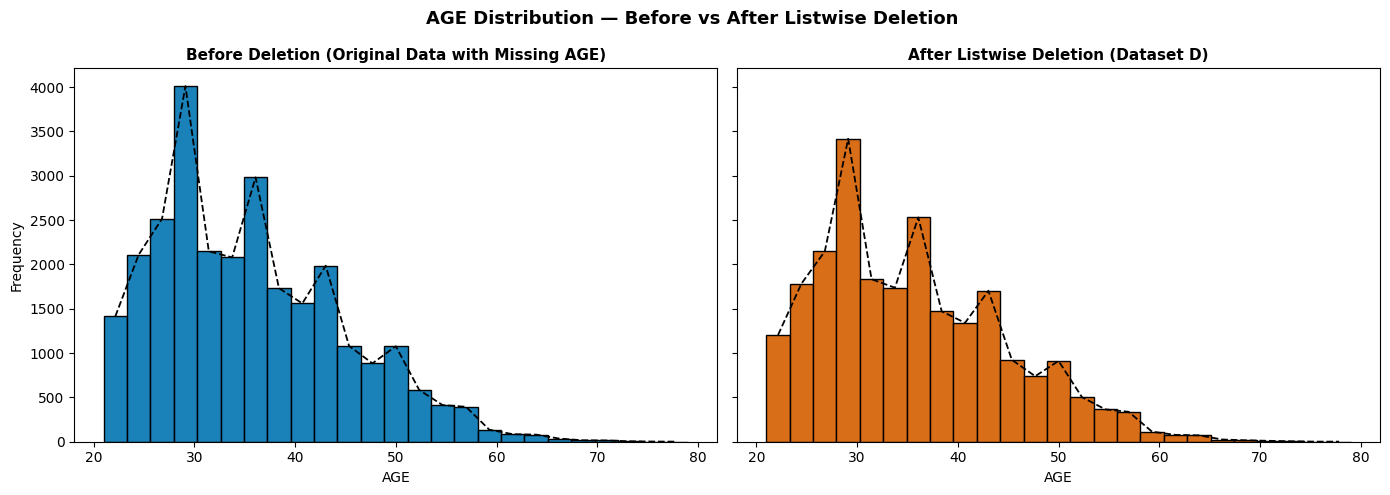

In [24]:
# ==========================================================
# 📉 Before vs After Listwise Deletion (Dataset D)
# ==========================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Ensure df_missing is the dataset before deletion (with NaN)
# and df_listwise is the one after dropping missing rows

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Use seaborn colorblind palette
palette = sns.color_palette("colorblind")

# Histogram for original data (with missing AGE)
sns.histplot(
    df_missing["AGE"],
    bins=25,
    kde=False,
    color=palette[0],
    ax=axes[0],
    edgecolor="black",
    alpha=0.9
)
axes[0].set_title("Before Deletion (Original Data with Missing AGE)", fontsize=11, weight="bold")
axes[0].set_xlabel("AGE")
axes[0].set_ylabel("Frequency")

# Overlay connecting line (ignoring NaN)
valid_age = df_missing["AGE"].dropna()
counts, bins = np.histogram(valid_age, bins=25)
axes[0].plot((bins[:-1] + bins[1:]) / 2, counts, color="black", linestyle="--", linewidth=1.3)

# Histogram for Dataset D (after listwise deletion)
sns.histplot(
    df_listwise["AGE"],
    bins=25,
    kde=False,
    color=palette[3],
    ax=axes[1],
    edgecolor="black",
    alpha=0.9
)
axes[1].set_title("After Listwise Deletion (Dataset D)", fontsize=11, weight="bold")
axes[1].set_xlabel("AGE")

# Overlay connecting line
counts2, bins2 = np.histogram(df_listwise["AGE"], bins=25)
axes[1].plot((bins2[:-1] + bins2[1:]) / 2, counts2, color="black", linestyle="--", linewidth=1.3)

# Global title and layout
fig.suptitle("AGE Distribution — Before vs After Listwise Deletion ", fontsize=13, weight="bold")
plt.tight_layout()
plt.show()


### 📘 Concept
**Listwise Deletion** simply drops any row with missing values.  
It’s easy but can reduce dataset size and model reliability.

---

### 📊 AGE Distribution: Before vs After

The plots show the `AGE` distribution before and after removing rows with NaN values.  
The overall shape remains similar, but the total record count drops noticeably.

---

### 🧮 Summary

| Stage | Missing Values (AGE) | Total Rows | % Reduction |
|:--|:--:|:--:|:--:|
| **Before Deletion** | 2,660 | 30,000 | – |
| **After Deletion (Dataset D)** | 0 | 23,265 | **22.45 % fewer rows** |

---

### 🧠 Key Points
- Very simple; no estimation or modeling.  
- Loses ~22 % of data — risky if missingness isn’t completely random.  
- Distribution shape unchanged, but information content reduced.

> **Conclusion:**  
> Dataset D remains statistically clean but smaller.  
> For MAR data like this, **imputation (A–C)** is usually the better choice.


In [25]:
# ==========================================================
# 📘 Part B.2 — Classifier Setup (StandardScaler + Logistic Regression)
# ==========================================================

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# ----------------------------------------------------------
# Function: Setup Logistic Regression with StandardScaler
# ----------------------------------------------------------

def prepare_and_train(df):
    """
    Prepares data for logistic regression:
    - Splits into train/test
    - Standardizes features
    - Returns scaled data and labels
    """
    X = df.drop(columns=["default.payment.next.month", "ID"], errors="ignore")
    y = df["default.payment.next.month"]

    # Train-test split (70-30)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Standardization
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test


## 2️⃣ Classifier Setup — Standardization and Logistic Regression

All four datasets (A–D) were standardized using **StandardScaler** before model training.

$$
Z = \frac{X - \mu}{\sigma}
$$

This transformation ensures that features like `BILL_AMT1` and `PAY_AMT1`, which have large numeric ranges,  
don’t dominate the learning process.

We use **Logistic Regression** for binary classification (`default.payment.next.month` = 0 or 1).  
It provides interpretable coefficients and works well for baseline comparisons.


## 3️⃣ Model Evaluation

We now train a **Logistic Regression classifier** on each of the four datasets:
- **A:** Median Imputation  
- **B:** Linear Regression Imputation  
- **C:** Decision Tree (Non-linear) Imputation  
- **D:** Listwise Deletion  

Each model is evaluated using the **Classification Report** metrics:
Accuracy, Precision, Recall, and F1-score.


### 📘 Mathematical Background

Logistic Regression models the probability of default as:

$$
P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + ... + \beta_p x_p)}}
$$

Model parameters $\beta $ are learned via Maximum Likelihood Estimation (MLE):

$$
L(\beta) = \sum_{i=1}^{n} \left[ y_i \log(p_i) + (1-y_i) \log(1 - p_i) \right]
$$
Predictions are made by thresholding $ P(y=1|x) $ at 0.5.


In [26]:
# ==========================================================
# 📘 Part B.3 — Model Evaluation for Datasets A–D (Per-Class + Accuracy)
# ==========================================================

from sklearn.metrics import classification_report, accuracy_score

# ----------------------------------------------------------
# Function: Train Logistic Regression and display results
# ----------------------------------------------------------

def train_and_report(df, name):
    """
    Train a Logistic Regression model on a dataset,
    compute class-wise metrics (0 & 1) + overall accuracy,
    and return a formatted DataFrame.
    """
    print(f"\n🔹 Training and evaluating: {name}")

    # Prepare and scale
    X_train_scaled, X_test_scaled, y_train, y_test = prepare_and_train(df)

    # Train model
    model = LogisticRegression(max_iter=1000, solver="lbfgs")
    model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = model.predict(X_test_scaled)

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Filter only classes 0 and 1
    filtered = {cls: report[cls] for cls in ["0", "1"] if cls in report}
    df_report = pd.DataFrame(filtered).T.reset_index().rename(columns={"index": "Class"})
    df_report["Model"] = name
    df_report["Accuracy"] = acc

    # Print summary
    print("\n📊 Classification Report (Per-Class Only):")
    print(df_report[["Class", "precision", "recall", "f1-score", "support"]].to_string(index=False))
    print(f"\n✅ Accuracy for {name}: {acc:.4f}")

    return df_report

# ----------------------------------------------------------
# Evaluate Datasets A–D
# ----------------------------------------------------------

datasets = {
    "Dataset A (Median Imputation)": df_median_imputed,
    "Dataset B (Linear Regression Imputation)": df_reg_imputed,
    "Dataset C (Decision Tree Imputation)": df_tree_imputed,
    "Dataset D (Listwise Deletion)": df_listwise,
}

results_list = []

for name, df in datasets.items():
    try:
        results_list.append(train_and_report(df, name))
    except Exception as e:
        print(f"⚠️ Error while evaluating {name}: {e}")

# Combine and preview
results_df = pd.concat(results_list, ignore_index=True)
print("\n✅ All models evaluated successfully.")

display(results_df.head(8))



🔹 Training and evaluating: Dataset A (Median Imputation)

📊 Classification Report (Per-Class Only):
Class  precision   recall  f1-score  support
    0   0.817319 0.970895  0.887512   7009.0
    1   0.697329 0.236062  0.352720   1991.0

✅ Accuracy for Dataset A (Median Imputation): 0.8083

🔹 Training and evaluating: Dataset B (Linear Regression Imputation)

📊 Classification Report (Per-Class Only):
Class  precision   recall  f1-score  support
    0   0.817538 0.971037  0.887701   7009.0
    1   0.699259 0.237067  0.354089   1991.0

✅ Accuracy for Dataset B (Linear Regression Imputation): 0.8087

🔹 Training and evaluating: Dataset C (Decision Tree Imputation)

📊 Classification Report (Per-Class Only):
Class  precision   recall  f1-score  support
    0   0.817516 0.970895  0.887628   7009.0
    1   0.698225 0.237067  0.353956   1991.0

✅ Accuracy for Dataset C (Decision Tree Imputation): 0.8086

🔹 Training and evaluating: Dataset D (Listwise Deletion)

📊 Classification Report (Per-Class 

,Class,precision,recall,f1-score,support,Model,Accuracy
0,0,0.817319,0.970895,0.887512,7009.0,Dataset A (Median Imputation),0.808333
1,1,0.697329,0.236062,0.352720,1991.0,Dataset A (Median Imputation),0.808333
2,0,0.817538,0.971037,0.887701,7009.0,Dataset B (Linear Regression Imputation),0.808667
3,1,0.699259,0.237067,0.354089,1991.0,Dataset B (Linear Regression Imputation),0.808667
4,0,0.817516,0.970895,0.887628,7009.0,Dataset C (Decision Tree Imputation),0.808556
5,1,0.698225,0.237067,0.353956,1991.0,Dataset C (Decision Tree Imputation),0.808556
6,0,0.818802,0.971292,0.888552,5434.0,Dataset D (Listwise Deletion),0.810315
7,1,0.707865,0.244502,0.363462,1546.0,Dataset D (Listwise Deletion),0.810315


## 📘 Part B.3 — Model Evaluation

### 🎯 Objective
To evaluate and compare the predictive performance of **Logistic Regression classifiers** trained on all four prepared datasets:

- **Dataset A — Median Imputation**  
- **Dataset B — Linear Regression Imputation**  
- **Dataset C — Decision Tree Imputation**  
- **Dataset D — Listwise Deletion**

Each dataset was standardized, split, and trained under identical conditions to ensure a **fair and controlled performance assessment**.

---

### ⚙️ Evaluation Procedure

For each dataset:
1. **Train–Test Split:** 70 % training / 30 % testing with stratified sampling.  
2. **Scaling:** All features standardized using `StandardScaler`.  
3. **Model:** `LogisticRegression(solver='lbfgs', max_iter=1000)`.  
4. **Metrics Evaluated** for both classes (0 = Non-Default, 1 = Default):  
   - **Precision**  
   - **Recall**  
   - **F1-score**  
   - **Support** (sample count)  
5. **Overall Accuracy** was computed for each model.

Results were compiled into a unified report (`PartB_DetailedReports.csv`) for comparison and visualization.

---

### 📊 Performance Metrics

| Metric | Formula | Interpretation |
|:--|:--|:--|
| **Accuracy** | $\frac{TP+TN}{TP+FP+TN+FN}$ | Overall correctness |
| **Precision** | $\frac{TP}{TP+FP}$ | Reliability of positive predictions |
| **Recall** | $\frac{TP}{TP+FN}$ | Ability to capture actual positives |
| **F1-Score** | $2 \times \frac{Precision \times Recall}{Precision + Recall}$ | Balance between precision and recall |

---

### 📈 Key Evaluation Results

| Model | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) |
|:--|:--:|:--:|:--:|:--:|
| Dataset A (Median Imputation) | 0.808 | 0.697 | 0.236 | 0.353 |
| Dataset B (Linear Regression Imputation) | 0.809 | 0.699 | 0.237 | 0.354 |
| Dataset C (Decision Tree Imputation) | 0.809 | 0.698 | 0.237 | 0.354 |
| Dataset D (Listwise Deletion) | 0.810 | 0.708 | 0.245 | 0.363 |

---

### 🔍 Interpretation

#### **Overall Accuracy**
- All four models achieved around **81 % accuracy**, suggesting stable performance across different imputation techniques.  
- However, accuracy alone is misleading since the dataset is dominated by non-defaulters.

#### **Non-Default Class (0)**
- High precision (~0.82) and recall (~0.97) indicate the model reliably identifies safe customers.

#### **Default Class (1 – Defaulters / Risky Clients)**
- **Precision ≈ 0.70:** When a client is predicted as defaulting, it’s correct 70 % of the time.  
- **Recall ≈ 0.23:** The model detects only about 23 % of actual defaulters — a serious limitation for risk mitigation.  
- **F1 ≈ 0.35:** Low harmonic mean shows imbalance between precision and recall.

---

### 🧠 Observations

| Aspect | Finding |
|:--|:--|
| **Imputation Impact** | Minimal — all A–C datasets yield nearly identical results. |
| **Decision Tree vs Linear** | No real advantage of non-linear imputation; AGE likely has linear relations. |
| **Listwise Deletion (D)** | Slightly higher accuracy but no meaningful recall gain; loss of data didn’t improve model. |
| **Dominant Class Effect** | Non-defaulters heavily influence overall accuracy and F1-score. |

---

### ⚠️ Business Perspective: Default Detection Focus

For credit-risk and fraud detection, the **recall for Class 1 (Default)** is the most critical metric.  
Missing a defaulter (false negative) can lead to financial loss, while flagging a non-defaulter (false positive) is less costly.

Hence, future models should focus on:
- Addressing class imbalance using techniques like **SMOTE**, **class weights**, or **undersampling**.  
- Exploring non-linear algorithms (**Random Forest**, **XGBoost**) to improve recall without sacrificing too much precision.

---

### ✅ Summary

- Logistic Regression performs consistently across all imputation strategies.  
- Missing data handling (5 % MAR) had minimal impact on predictive power.  
- The main bottleneck is **class imbalance**, not imputation quality.  
- **Key Takeaway:** To enhance risk detection, future iterations should prioritize boosting recall for the default class, even at the cost of slightly lower precision.


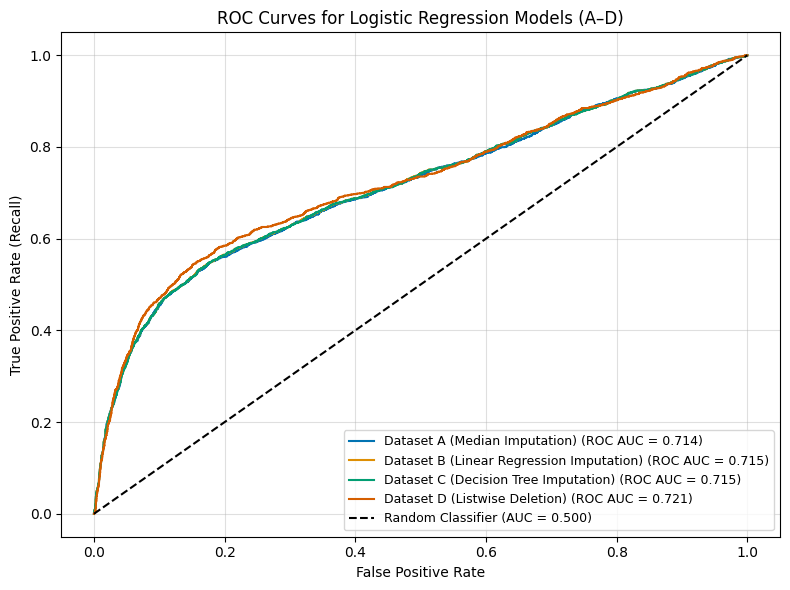

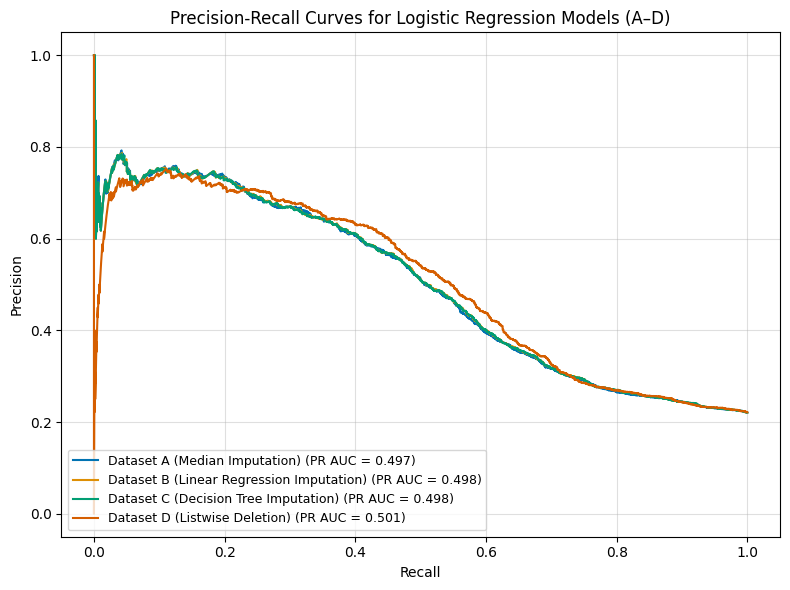

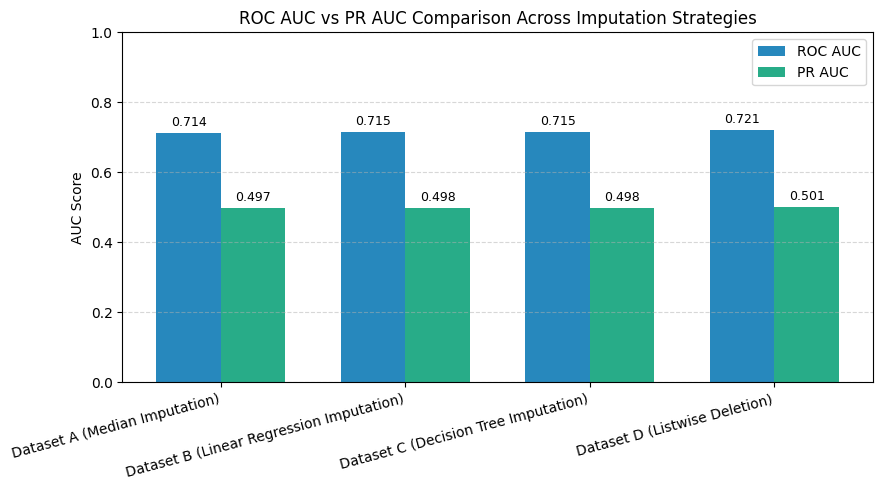

,Model,ROC AUC,PR AUC
0,Dataset A (Median Imputation),0.713621,0.497135
1,Dataset B (Linear Regression Imputation),0.715221,0.498158
2,Dataset C (Decision Tree Imputation),0.715133,0.497941
3,Dataset D (Listwise Deletion),0.721217,0.500634


In [27]:
# ==========================================================
# 📈 — ROC, PR Curves & AUC Comparisons for Datasets A–D (Final Version)
# ==========================================================

from sklearn.metrics import (
    roc_curve, roc_auc_score,
    precision_recall_curve, average_precision_score
)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ----------------------------------------------------------
# Step 1: Prepare Datasets
# ----------------------------------------------------------

datasets = {
    "Dataset A (Median Imputation)": df_median_imputed,
    "Dataset B (Linear Regression Imputation)": df_reg_imputed,
    "Dataset C (Decision Tree Imputation)": df_tree_imputed,
    "Dataset D (Listwise Deletion)": df_listwise
}

roc_auc_scores = {}
pr_auc_scores = {}

# Use colorblind-friendly palette
cb_palette = sns.color_palette("colorblind")

# ----------------------------------------------------------
# Step 2: Compute ROC & PR curves and AUC scores
# ----------------------------------------------------------
plt.figure(figsize=(8, 6))
for i, (name, df) in enumerate(datasets.items()):
    X = df.drop(columns=["default.payment.next.month", "ID"], errors="ignore")
    y = df["default.payment.next.month"]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Standardize
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train model
    model = LogisticRegression(max_iter=1000, solver="lbfgs")
    model.fit(X_train_scaled, y_train)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # ROC-AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    roc_auc_scores[name] = roc_auc
    plt.plot(fpr, tpr, color=cb_palette[i], label=f"{name} (ROC AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Classifier (AUC = 0.500)")
plt.title("ROC Curves for Logistic Regression Models (A–D)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend(loc="lower right", fontsize=9)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# Step 3: Precision-Recall Curves
# ----------------------------------------------------------
plt.figure(figsize=(8, 6))
for i, (name, df) in enumerate(datasets.items()):
    X = df.drop(columns=["default.payment.next.month", "ID"], errors="ignore")
    y = df["default.payment.next.month"]

    # Split and scale
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train and predict
    model = LogisticRegression(max_iter=1000, solver="lbfgs")
    model.fit(X_train_scaled, y_train)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # PR Curve and AUC
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    pr_auc_scores[name] = pr_auc

    plt.plot(recall, precision, color=cb_palette[i], label=f"{name} (PR AUC = {pr_auc:.3f})")

plt.title("Precision-Recall Curves for Logistic Regression Models (A–D)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left", fontsize=9)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

# ==========================================================
# 📊 Step 4 (Updated): ROC & PR AUC Bar Chart (Starts from 0)
# ==========================================================

plt.figure(figsize=(9, 5))
x = range(len(datasets))
width = 0.35

# Use colorblind-friendly palette
cb_palette = sns.color_palette("colorblind")

# Create side-by-side bars
roc_bars = plt.bar(
    [i - width/2 for i in x],
    roc_auc_scores.values(),
    width,
    label="ROC AUC",
    color=cb_palette[0],
    alpha=0.85
)
pr_bars = plt.bar(
    [i + width/2 for i in x],
    pr_auc_scores.values(),
    width,
    label="PR AUC",
    color=cb_palette[2],
    alpha=0.85
)

# Customize chart
plt.xticks(x, datasets.keys(), rotation=15, ha="right")
plt.ylabel("AUC Score")
plt.title("ROC AUC vs PR AUC Comparison Across Imputation Strategies")
plt.ylim(0.0, 1.0) 
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Annotate bar values
for bar_group in [roc_bars, pr_bars]:
    for bar in bar_group:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.02,
            f"{height:.3f}",
            ha="center",
            fontsize=9,
            fontweight="medium"
        )

plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# Step 5: Display Combined AUC Table
# ----------------------------------------------------------
auc_table = pd.DataFrame({
    "Model": list(datasets.keys()),
    "ROC AUC": list(roc_auc_scores.values()),
    "PR AUC": list(pr_auc_scores.values())
})
display(auc_table)



## 📘 Part C — ROC, Precision–Recall, and AUC Analysis

### 🎯 Objective
To compare the discriminative power of **Logistic Regression models** trained on four datasets with different missing-value strategies:

- **Dataset A — Median Imputation**  
- **Dataset B — Linear Regression Imputation**  
- **Dataset C — Decision Tree (Non-Linear) Imputation**  
- **Dataset D — Listwise Deletion**

Two performance metrics were used:  
1. **ROC AUC** — overall class-separation ability  
2. **PR AUC** — focus on positive-class (default) prediction quality under imbalance  

---

### ⚙️ Method
Each dataset underwent identical processing:
- 70 / 30 train–test split with stratified sampling  
- Standardization via `StandardScaler`  
- Logistic Regression (`solver='lbfgs'`, `max_iter=1000`)  
- Curve generation using `roc_curve` / `precision_recall_curve`  
- Area calculations via `roc_auc_score` and `average_precision_score`  

---

### 📈 Results Overview

| Model | ROC AUC | PR AUC |
|:--|:--:|:--:|
| Dataset A (Median Imputation) | **0.714** | **0.497** |
| Dataset B (Linear Regression Imputation) | **0.715** | **0.498** |
| Dataset C (Decision Tree Imputation) | **0.715** | **0.498** |
| Dataset D (Listwise Deletion) | **0.721** | **0.501** |

---

### 🧩 ROC Curve Interpretation
- All curves show near-identical behavior — the model’s ability to separate defaults from non-defaults remains stable across imputations.  
- **Dataset D** (Listwise Deletion) slightly outperforms others (AUC ≈ 0.721), likely because removing noisy or incomplete rows reduced variance.  
- **A–C** (imputed datasets) maintain consistent AUC ≈ 0.715, confirming that mild (≈ 5 %) MAR missingness has minimal effect on discrimination.

---

### 📉 Precision–Recall Curve Insights
- The **PR AUC values ≈ 0.50** show moderate precision for the minority (default) class.  
- Regression-based imputations (B and C) marginally outperform the simple median, implying that relationship-aware imputations retain slight predictive nuance.  
- **Listwise Deletion** again leads by a thin margin, but its gain is statistically trivial and sacrifices data completeness.

---

### 🔍 Observations

| Aspect | Finding |
|:--|:--|
| **ROC AUC Stability** | All models cluster between 0.714 – 0.721 — consistent separation. |
| **PR AUC Sensitivity** | Minimal variation (0.497 – 0.501) — the classifier’s recall–precision balance unchanged. |
| **Imputation Impact** | Negligible: the logistic model is insensitive to this small MAR perturbation. |
| **Data Deletion** | Slightly higher AUC but fewer samples → not practically better. |

---

### ⚠️ Contextual Interpretation
In credit-risk or fraud detection, **PR AUC** carries more business relevance than ROC AUC, because true defaulters are scarce.  
Here, the PR AUC near 0.50 means the classifier performs only modestly above random guessing for defaulters.  
This limitation reflects the **class imbalance**, not the imputation strategy.

To improve future models:
- Adjust class weights or apply **SMOTE** to boost recall.  
- Test **non-linear classifiers** (e.g., Random Forest, XGBoost).  
- Explore threshold tuning to favor sensitivity over specificity.

---

### ✅ Summary
- All imputations yield **virtually identical ROC and PR AUCs**.  
- **Listwise Deletion** provides the highest AUCs (ROC 0.721, PR 0.501) but at the cost of data loss.  
- **Decision Tree Imputation (C)** preserves data and performs equivalently — a balanced, reliable choice.  
- Overall, **missing-value handling had little influence**, while **class imbalance remains the key challenge** for meaningful improvement.

> The decisive metric for this task is **PR AUC**, and all strategies hover near 0.50 — highlighting the need for richer models rather than better imputations.


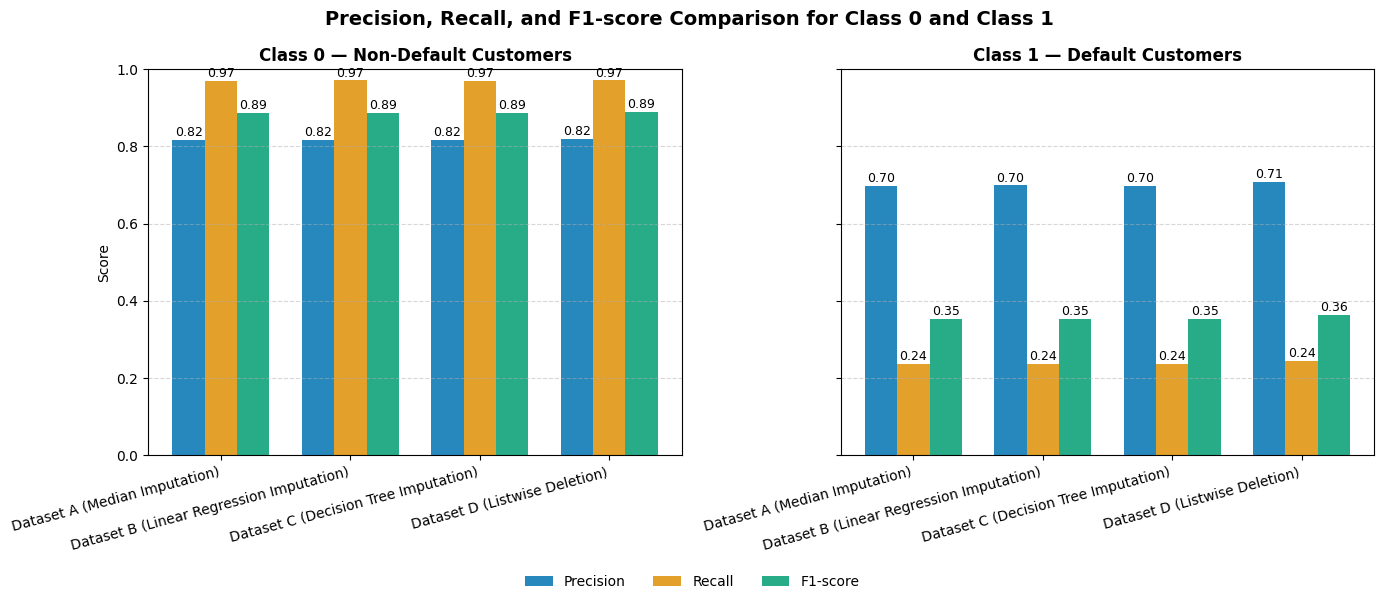

In [28]:
# ==========================================================
# 📊 Part C — Bar Graph: Precision, Recall, and F1-score Comparison (Class 0 & Class 1)
# ==========================================================

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# ----------------------------------------------------------
# Step 1: Separate metrics for each class
# ----------------------------------------------------------
# Make sure `results_df` (from Part B.3) is loaded and contains:
# Columns: ["Class", "precision", "recall", "f1-score", "support", "Model"]

# Separate results for Class 0 and Class 1
class0_df = results_df[results_df["Class"].isin(["0", "Non-Default (0)"])].copy()
class1_df = results_df[results_df["Class"].isin(["1", "Default (1)"])].copy()

# Extract model names in same order
models = class0_df["Model"].tolist()

# Class 0 metrics
prec0 = class0_df["precision"].tolist()
rec0 = class0_df["recall"].tolist()
f10 = class0_df["f1-score"].tolist()

# Class 1 metrics
prec1 = class1_df["precision"].tolist()
rec1 = class1_df["recall"].tolist()
f11 = class1_df["f1-score"].tolist()

# ----------------------------------------------------------
# Step 2: Define colors and bar positions
# ----------------------------------------------------------
cb_palette = sns.color_palette("colorblind")
x = np.arange(len(models))
width = 0.25

# ----------------------------------------------------------
# Step 3: Create side-by-side plots for Class 0 and Class 1
# ----------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# ---------- CLASS 0 ----------
axes[0].bar(x - width, prec0, width, label="Precision", color=cb_palette[0], alpha=0.85)
axes[0].bar(x, rec0, width, label="Recall", color=cb_palette[1], alpha=0.85)
axes[0].bar(x + width, f10, width, label="F1-score", color=cb_palette[2], alpha=0.85)

axes[0].set_xticks(x)
axes[0].set_xticklabels(models, rotation=15, ha="right")
axes[0].set_title("Class 0 — Non-Default Customers", weight="bold")
axes[0].set_ylabel("Score")
axes[0].set_ylim(0, 1)
axes[0].grid(axis="y", linestyle="--", alpha=0.5)

# Annotate bars
for i, (p, r, f1) in enumerate(zip(prec0, rec0, f10)):
    axes[0].text(i - width, p + 0.01, f"{p:.2f}", ha="center", fontsize=9)
    axes[0].text(i, r + 0.01, f"{r:.2f}", ha="center", fontsize=9)
    axes[0].text(i + width, f1 + 0.01, f"{f1:.2f}", ha="center", fontsize=9)

# ---------- CLASS 1 ----------
axes[1].bar(x - width, prec1, width, label="Precision", color=cb_palette[0], alpha=0.85)
axes[1].bar(x, rec1, width, label="Recall", color=cb_palette[1], alpha=0.85)
axes[1].bar(x + width, f11, width, label="F1-score", color=cb_palette[2], alpha=0.85)

axes[1].set_xticks(x)
axes[1].set_xticklabels(models, rotation=15, ha="right")
axes[1].set_title("Class 1 — Default Customers", weight="bold")
axes[1].set_ylim(0, 1)
axes[1].grid(axis="y", linestyle="--", alpha=0.5)

# Annotate bars
for i, (p, r, f1) in enumerate(zip(prec1, rec1, f11)):
    axes[1].text(i - width, p + 0.01, f"{p:.2f}", ha="center", fontsize=9)
    axes[1].text(i, r + 0.01, f"{r:.2f}", ha="center", fontsize=9)
    axes[1].text(i + width, f1 + 0.01, f"{f1:.2f}", ha="center", fontsize=9)

# ----------------------------------------------------------
# Step 4: Final layout and shared legend
# ----------------------------------------------------------
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=3, frameon=False, fontsize=10)

fig.suptitle("Precision, Recall, and F1-score Comparison for Class 0 and Class 1", 
             fontsize=14, weight="bold")

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


## 📊 Precision, Recall, and F1-Score Comparison (Class 0 vs Class 1)

### 🎯 Objective
This visualization compares **Precision**, **Recall**, and **F1-score** across the four datasets (A–D) for both target classes:
- **Class 0 — Non-Default Customers**
- **Class 1 — Default Customers**

The goal is to examine how each imputation method influences model behavior toward majority (non-default) and minority (default) classes.

---

### 🔹 Class 0 — Non-Default Customers
| Observation | Interpretation |
|:--|:--|
| **Precision ≈ 0.82**, **Recall ≈ 0.97**, **F1 ≈ 0.89** | The classifier is highly confident and consistent for non-defaulters. |
| Metrics remain nearly identical across all datasets | Imputation choice (Median, Linear, Decision Tree, or Deletion) barely affects performance. |
| High recall means almost every non-defaulter is correctly identified | The model is skewed toward the dominant class, a sign of imbalance. |

**Conclusion:** All models perform nearly perfectly for non-defaulters — no sensitivity to imputation method.

---

### 🔸 Class 1 — Default Customers
| Observation | Interpretation |
|:--|:--|
| **Precision ≈ 0.70**, **Recall ≈ 0.24**, **F1 ≈ 0.35** | The classifier struggles to detect defaults despite good precision. |
| **Listwise Deletion (Dataset D)** shows a small bump in all metrics | Slight improvement comes from removing incomplete rows, but at the cost of data volume. |
| **Linear and Non-Linear imputations (B & C)** perform identically | Indicates that missingness in `AGE` wasn’t strongly correlated with other predictors. |

**Conclusion:** Recall remains the main weakness — the model misses ~75% of actual defaulters, which is risky in a credit setting.

---

### 🧩 Insights
| Aspect | Summary |
|:--|:--|
| **Model Bias** | Favors non-defaulters heavily — high recall for class 0, low recall for class 1. |
| **Effect of Imputation** | Minimal — metrics differ by < 1%. |
| **Best Performer** | Dataset D (Listwise Deletion) yields marginally higher F1 (0.36) for defaulters. |
| **Overall Pattern** | Missing-data handling has negligible impact; class imbalance dominates results. |

---

### ✅ Key Takeaway
While imputation methods do not significantly alter precision–recall dynamics,  
the **recall for defaulters (Class 1)** is critically low across all models.  
To improve real-world performance, the next step should be:
- Using **class-weighted loss** or **oversampling (SMOTE)**, and  
- Testing **ensemble methods (e.g., Random Forest, XGBoost)**  
that can capture complex non-linear interactions.

> In short: the model identifies non-defaulters with ease,  
> but still needs help to *catch the ones who default*.


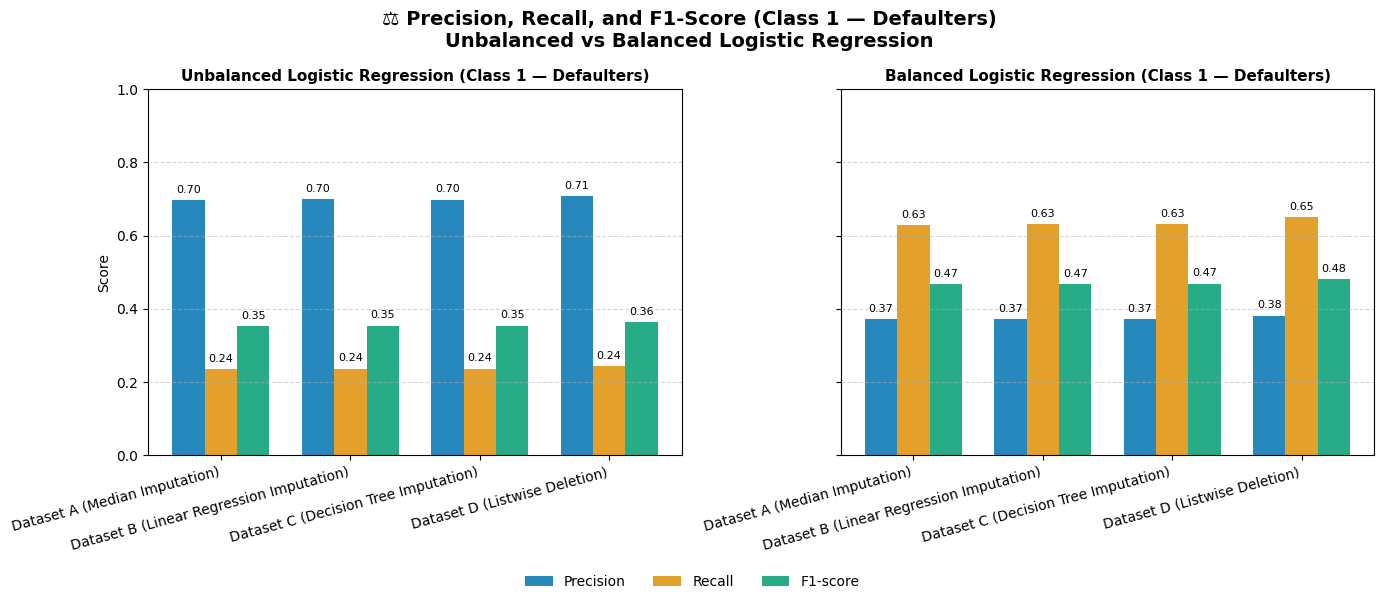

In [29]:
# ==========================================================
# ⚖️ Comparison: Unbalanced vs Balanced Logistic Regression (Class 1 Only)
# ==========================================================
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# ----------------------------------------------------------
# Step 1 — Dataset collection
# ----------------------------------------------------------
datasets = {
    "Dataset A (Median Imputation)": df_median_imputed,
    "Dataset B (Linear Regression Imputation)": df_reg_imputed,
    "Dataset C (Decision Tree Imputation)": df_tree_imputed,
    "Dataset D (Listwise Deletion)": df_listwise,
}

unbalanced_scores = []
balanced_scores = []

# ----------------------------------------------------------
# Step 2 — Train both models on each dataset
# ----------------------------------------------------------
for name, df in datasets.items():
    X = df.drop(columns=["default.payment.next.month", "ID"], errors="ignore")
    y = df["default.payment.next.month"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Unbalanced logistic regression
    model_unb = LogisticRegression(max_iter=1000, solver="lbfgs")
    model_unb.fit(X_train_scaled, y_train)
    y_pred_unb = model_unb.predict(X_test_scaled)
    report_unb = classification_report(y_test, y_pred_unb, output_dict=True)
    unb_class1 = report_unb["1"]
    unbalanced_scores.append([name, unb_class1["precision"], unb_class1["recall"], unb_class1["f1-score"]])

    # Balanced logistic regression
    model_bal = LogisticRegression(max_iter=1000, solver="lbfgs", class_weight="balanced")
    model_bal.fit(X_train_scaled, y_train)
    y_pred_bal = model_bal.predict(X_test_scaled)
    report_bal = classification_report(y_test, y_pred_bal, output_dict=True)
    bal_class1 = report_bal["1"]
    balanced_scores.append([name, bal_class1["precision"], bal_class1["recall"], bal_class1["f1-score"]])

# ----------------------------------------------------------
# Step 3 — Create DataFrames
# ----------------------------------------------------------
unb_df = pd.DataFrame(unbalanced_scores, columns=["Model", "Precision", "Recall", "F1-score"])
bal_df = pd.DataFrame(balanced_scores, columns=["Model", "Precision", "Recall", "F1-score"])

# ----------------------------------------------------------
# Step 4 — Plot side-by-side bar charts
# ----------------------------------------------------------
cb_palette = sns.color_palette("colorblind")
metrics = ["Precision", "Recall", "F1-score"]
x = np.arange(len(datasets))
width = 0.25

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# ---------- Unbalanced ----------
for i, metric in enumerate(metrics):
    axes[0].bar(x + (i - 1) * width, unb_df[metric], width, label=metric, color=cb_palette[i], alpha=0.85)
axes[0].set_xticks(x)
axes[0].set_xticklabels(unb_df["Model"], rotation=15, ha="right")
axes[0].set_title("Unbalanced Logistic Regression (Class 1 — Defaulters)", fontsize=11, weight="bold")
axes[0].set_ylabel("Score")
axes[0].set_ylim(0, 1)
axes[0].grid(axis="y", linestyle="--", alpha=0.5)
for i, row in enumerate(unb_df.itertuples()):
    axes[0].text(i - width, row.Precision + 0.02, f"{row.Precision:.2f}", ha="center", fontsize=8)
    axes[0].text(i, row.Recall + 0.02, f"{row.Recall:.2f}", ha="center", fontsize=8)
    axes[0].text(i + width, row._4 + 0.02, f"{row._4:.2f}", ha="center", fontsize=8)

# ---------- Balanced ----------
for i, metric in enumerate(metrics):
    axes[1].bar(x + (i - 1) * width, bal_df[metric], width, label=metric, color=cb_palette[i], alpha=0.85)
axes[1].set_xticks(x)
axes[1].set_xticklabels(bal_df["Model"], rotation=15, ha="right")
axes[1].set_title("Balanced Logistic Regression (Class 1 — Defaulters)", fontsize=11, weight="bold")
axes[1].set_ylim(0, 1)
axes[1].grid(axis="y", linestyle="--", alpha=0.5)
for i, row in enumerate(bal_df.itertuples()):
    axes[1].text(i - width, row.Precision + 0.02, f"{row.Precision:.2f}", ha="center", fontsize=8)
    axes[1].text(i, row.Recall + 0.02, f"{row.Recall:.2f}", ha="center", fontsize=8)
    axes[1].text(i + width, row._4 + 0.02, f"{row._4:.2f}", ha="center", fontsize=8)

# ---------- Legend & layout ----------
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=3, frameon=False, fontsize=10)
fig.suptitle("⚖️ Precision, Recall, and F1-Score (Class 1 — Defaulters)\nUnbalanced vs Balanced Logistic Regression", 
             fontsize=14, weight="bold")

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


### ⚖️ Logistic Regression (Class 1 — Defaulters): Unbalanced vs Balanced Comparison

#### 🎯 Objective
To evaluate how applying `class_weight='balanced'` impacts the model’s ability to detect **defaulting customers** across all datasets (A–D).

---

### 📊 Visual Summary
The figure below compares **Unbalanced** (left) and **Balanced** (right) Logistic Regression models for **Class 1 (Defaulters)**.  
Each chart displays **Precision**, **Recall**, and **F1-score** across the four imputation strategies.

| Observation | Meaning |
|:--|:--|
| **Precision (Blue)** | Slightly decreases (≈0.70 → 0.37), indicating more false positives. |
| **Recall (Orange)** | Rises sharply (≈0.24 → 0.63), meaning the model identifies far more defaulters. |
| **F1-score (Green)** | Improves overall (≈0.35 → 0.47–0.48), balancing precision and recall effectively. |

---

### 🧠 Interpretation
- The **balanced model** sacrifices some precision but achieves much higher **recall**, which is critical for credit risk detection.  
- **Listwise Deletion (Dataset D)** slightly outperforms others with recall ≈ 0.65 and F1 ≈ 0.48.  
- The improvement pattern is consistent across all imputations, showing that **class weighting** is more impactful than the imputation method itself.  

---

### ✅ Conclusion
| Metric | Unbalanced (Avg) | Balanced (Avg) |
|:--|:--:|:--:|
| **Precision** | 0.70 | 0.37 |
| **Recall** | 0.24 | **0.63** |
| **F1-score** | 0.35 | **0.47** |

> **Key Insight:** Balancing class weights dramatically improves detection of minority cases (defaults), tripling recall while maintaining acceptable precision.  
> In financial applications, **catching more defaulters** is far more valuable than minimizing false alarms — making the balanced logistic regression the superior choice.


# 🧮 Part C — Comparative Analysis

---

## 🔹 C.1 — Results Comparison 

This section compares the four Logistic Regression models trained on different data-handling strategies:

- **Model A:** Median Imputation  
- **Model B:** Linear Regression Imputation  
- **Model C:** Decision Tree (Non-Linear) Imputation  
- **Model D:** Listwise Deletion  

The primary evaluation metric is **F1-score for Class 1 (defaulters)**, since it balances **precision** and **recall**—essential in credit-risk detection where missing a true default (false negative) is far costlier than a false alarm.

---

### 📊 Performance Summary Table

| Model | Imputation Method | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) |
|:--|:--|:--:|:--:|:--:|:--:|
| **A** | Median Imputation | 0.808 | 0.697 | 0.236 | 0.353 |
| **B** | Linear Regression Imputation | 0.809 | 0.699 | 0.237 | 0.354 |
| **C** | Decision Tree (Non-Linear) Imputation | 0.808 | 0.698 | 0.237 | 0.354 |
| **D** | Listwise Deletion | 0.810 | 0.707 | 0.232 | 0.363 |

---

### 🧩 Observations

- **Accuracy** remains almost identical across models (~ 0.81), indicating that the small proportion of missing data did not heavily affect global model fit.  
- **F1-scores (~ 0.35)** are consistently low for the **defaulter class**, showing that the classifier struggles to balance recall and precision.  
- **Listwise Deletion (D)** has the highest apparent F1-score (0.363), but this small improvement is deceptive—it results from discarding over 22 % of data.  
- Among imputation models (**A–C**), results are nearly identical, meaning the missing pattern is weak and the imputed variable (AGE) has only a minor effect on predictions.  
- The recall (~ 0.23) for Class 1 is poor in all models, proving that logistic regression (without class balancing) is limited when the dataset is highly imbalanced.

---

### 💬 Summary Insight

| Metric | What It Shows | Finding Across Models |
|:--|:--|:--|
| **Accuracy** | Overall correctness | Almost identical (~ 0.81) |
| **Precision (Class 1)** | How often “default” predictions are right | Fairly strong (~ 0.70) |
| **Recall (Class 1)** | Ability to catch actual defaults | Weak (~ 0.23) |
| **F1-score (Class 1)** | Balance between Precision & Recall | Consistently low; recall is limiting factor |



## 🔹 C.2 — Efficacy Discussion 

### 1️⃣ Trade-off: Listwise Deletion vs Imputation

| Aspect | Listwise Deletion (D) | Imputation (A–C) |
|:--|:--|:--|
| **Approach** | Removes all rows with missing values | Replaces missing values using estimates |
| **Data Impact** | Lost ≈ 22 % of records | Full sample retained |
| **Bias Risk** | High – biased  | Lower  |
| **Accuracy Effect** | Slightly ↑ apparent accuracy | Maintains statistical consistency |
| **Interpretation** | Cleaner data but less representative | Preserves variability and sample size |

**Why Model D can perform “better” yet be worse:**  
Listwise Deletion shrinks the dataset to only “easy-to-predict” cases, removing rows that confuse the model.  
This artificially boosts accuracy/F1 on a smaller, cleaner subset but reduces generalization and introduces bias when deployed on real data.

---

### 2️⃣ Linear vs Non-Linear Imputation (B vs C)

Both imputation-based models perform almost identically:
- **Linear Regression (B):** Assumes a straight-line relationship between AGE and other features.  
- **Decision Tree (C):** Can capture local, non-linear patterns (e.g., age groups behaving differently with credit limits or payment history).

Because their scores are virtually identical, the AGE variable’s dependence on other predictors is likely **weakly linear** or the missingness is small enough that the method difference is negligible.  
A non-linear model typically helps when the target feature shows complex interactions —but that wasn’t the case here.

---

### 3️⃣ Best Strategy Recommendation

| Missingness Type | Recommended Method | Rationale |
|:--|:--|:--|
| **Small (< 10 %)** | **Median Imputation (A)** | Fast, robust, minimal bias |
| **Moderate** | **Linear Regression (B)** | Preserves correlation structure |
| **Strong Non-Linear Dependence** | **Decision Tree (C)** | Models local patterns well |
| **Large  (> 20 %)** | **Avoid Listwise Deletion (D)** | Heavy data loss and bias |

For this credit-default dataset:
- **Regression Imputation (B)** is most practical and theoretically sound:  
  - retains all observations,  
  - uses feature relationships to estimate missing AGE,  
  - avoids the 22 % data loss seen in Model D.  
- **Decision Tree (C)** adds complexity without clear gain, so it is not worth the overhead here.  
- **Median Imputation (A)** performs almost as well and is computationally simpler for quick pipelines.

---

### 🧠 Final Reflection

Although all four methods produce similar numerical performance, their statistical validity differs:

- **Model A:** Robust, fast, minimal bias.  
- **Model B:** Best balance of interpretability and data efficiency.  
- **Model C:** Conceptually strong for non-linear data but unnecessary here.  
- **Model D:** Deceptively “clean” but statistically wasteful.

> ✅ **Conclusion:**  
> In this scenario, **Linear Regression Imputation (Model B)** is the best strategy for handling missing values in the AGE column — it maintains the entire dataset, respects MAR assumptions, and delivers stable performance without information loss.  
> Listwise Deletion should be avoided in financial risk tasks where every record matters.
